In [ ]:
import pandas as pd
from urllib.parse import quote

sheet_id = "18vvy3mSRe_6TcmhtYi4r7Iw0yiVPxzVh"
sheet_name = "Online Retail"
encoded_sheet_name = quote(sheet_name)

csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={encoded_sheet_name}"

df = pd.read_csv(csv_url)
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,NaN,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365.0,NaN,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365.0,NaN,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365.0,NaN,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
print(df.shape)

print(df.dtypes)

(541909, 8)
InvoiceNo      float64
StockCode      float64
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [ ]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [ ]:

df['Sales'] = df['Quantity'] * df['UnitPrice']


sales_summary = df.groupby(['Country', 'Description'])['Sales'].sum().reset_index()


sales_summary = sales_summary.sort_values(['Country', 'Sales'], ascending=[True, False])


print(top_3_products_per_country)


              Country                         Description      Sales
16723  United Kingdom                      DOTCOM POSTAGE  206245.48
18529  United Kingdom            REGENCY CAKESTAND 3 TIER  134405.94
19528  United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER   93953.07
8298          Germany                             POSTAGE   20821.00
6626           France                             POSTAGE   15065.00
...               ...                                 ...        ...
12855             RSA           WOODEN CROQUET GARDEN SET      29.90
12849             RSA                      SPOTTY BUNTING      29.70
12863    Saudi Arabia              PLASTERS IN TIN SKULLS      19.80
12864    Saudi Arabia           PLASTERS IN TIN STRONGMAN      19.80
12862    Saudi Arabia      PLASTERS IN TIN CIRCUS PARADE       19.80

[114 rows x 3 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/top_3_products_per_country.xlsx'

top_3_products_per_country.to_excel(file_path, index=False)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


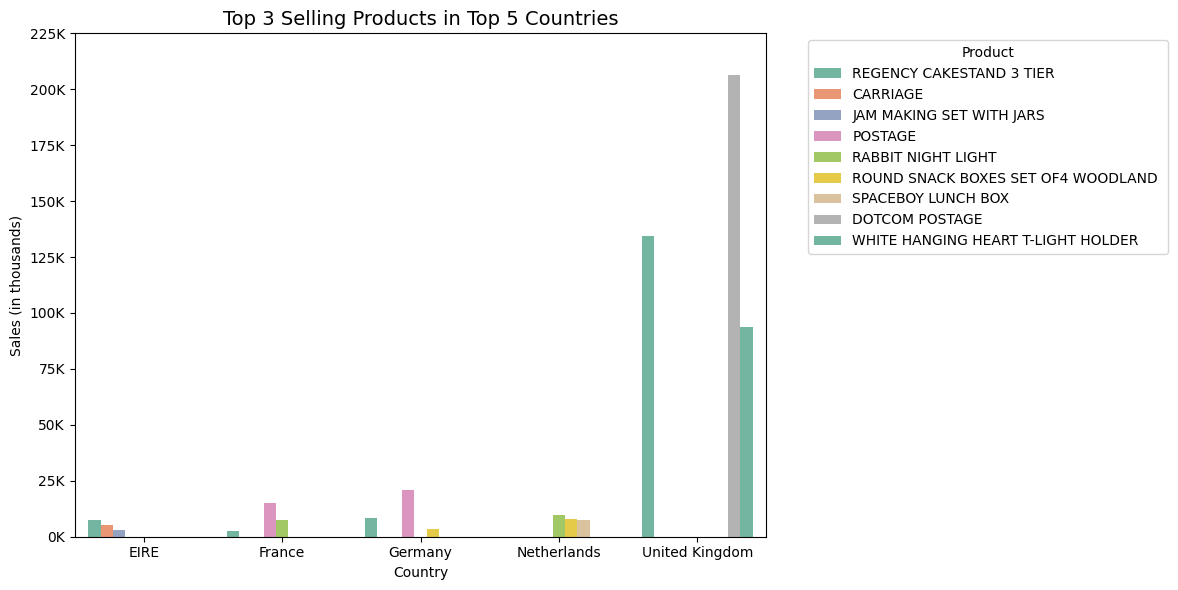

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


total_sales_per_country = top_3_products_per_country.groupby('Country')['Sales'].sum().sort_values(ascending=False)
top_5_countries = total_sales_per_country.head(5).index


filtered_df = top_3_products_per_country[top_3_products_per_country['Country'].isin(top_5_countries)].copy()
filtered_df = filtered_df.sort_values(['Country', 'Sales'], ascending=[True, False])


plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_df,
    x='Country',
    y='Sales',
    hue='Description',
    palette='Set2'
)


plt.ylabel('Sales (in thousands)')
plt.yticks(ticks=plt.yticks()[0], labels=[f'{x/1000:.0f}K' for x in plt.yticks()[0]])
plt.title('Top 3 Selling Products in Top 5 Countries', fontsize=14)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
